https://madys.readthedocs.io/en/latest/computation_run.html

* Use madys to confirm the youth using stellar evolutionary model plotted on CMD of <0.1Gyr UBC clusters
* Use other cluster catalogs too

In [1]:
# %load init_ipynb

## Check if PsC Eri is indeed ~30Myr

In [3]:
from catalog import CatalogDownloader

cd = CatalogDownloader(catalog_name="Curtis2019", catalog_type="cluster")
tabs = cd.get_tables_from_vizier(row_limit=-1)

{'J/AJ/158/77/table2': 'Rotation periods for Meingast et al. (2019, '
                       'J/A+A/622/L13) members of the Psc-Eri stream',
 'J/AJ/158/77/table3': 'Candidate massive members of the Psc-Eri stream'}


In [4]:
df = tabs[0].to_pandas()
df.head()

,Seq,f_Seq,Source,RA_ICRS,DE_ICRS,GBP-GRP,Teff,Gmag,GMag,Prot,Note,Simbad
0,1,,3198972700981234048,04 22 31.5,-07 33 03.2,0.432,7187,8.903,2.802,0.52,Warm,Simbad
1,2,,5181474045115843072,03 10 47.3,-06 34 29.8,0.446,7161,8.562,2.954,0.87,Warm,Simbad
2,3,,2516948215250061568,02 20 22.6,+05 52 59.1,0.597,6622,9.183,3.534,0.82,Warm,Simbad
3,4,,3245408684793798528,04 02 15.4,-05 53 48.2,0.604,6573,9.425,3.513,0.56,Conv.,Simbad
4,5,,6628071944405827712,22 36 31.1,-21 35 06.0,0.647,6320,8.967,3.835,0.94,Conv.,Simbad


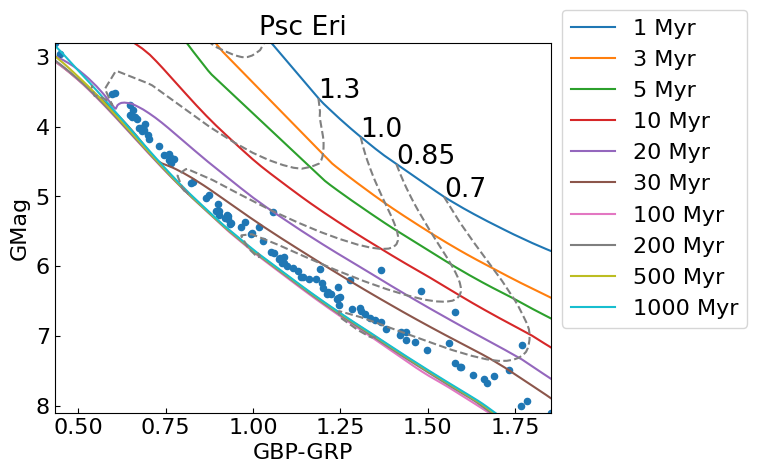

In [5]:
from madys import IsochroneGrid

xparam = 'GBP-GRP'
yparam = 'GMag'
xlims = df[xparam].min(), df[xparam].max()
ylims = df[yparam].min(), df[yparam].max()

ax = df.plot(x=xparam, y=yparam, kind='scatter')
ax.set_title("Psc Eri")
ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.invert_yaxis()

#overlay model
IsochroneGrid.plot_isochrones('Gbp-Grp', 'G', 'mist', ax=ax)
ax.legend(bbox_to_anchor=(1, 0.2))

In [6]:
star_list = df.Source.apply(lambda x: f"Gaia DR2 {x}").tolist()
star_list[:5]

['Gaia DR2 3198972700981234048',
 'Gaia DR2 5181474045115843072',
 'Gaia DR2 2516948215250061568',
 'Gaia DR2 3245408684793798528',
 'Gaia DR2 6628071944405827712']

## Check CMD of UBC in Castro-Ginard

In [8]:
from catalog import CatalogDownloader

cd = CatalogDownloader(catalog_name="CastroGinard2022", catalog_type="cluster")
tabs = cd.get_tables_from_vizier(row_limit=-1)
df = tabs[0].to_pandas()
df_mem = tabs[1].to_pandas()
df_mem.head()

{'J/A+A/661/A118/table1': 'Mean parameters for the reported UBC clusters',
 'J/A+A/661/A118/table2': 'Members for the reported UBC clusters'}


,Seq,Cluster,GaiaEDR3,RA_ICRS,DE_ICRS,GLON,GLAT,plx,pmRA,pmDE,RV,Gmag,BP-RP,_RA.icrs,_DE.icrs
0,0,UBC1001,4057224024226708992,267.525044,-29.364191,0.139327,-1.058598,0.367668,0.429,-1.939,NaN,14.143807,1.114144,267.525042,-29.364182
1,1,UBC1001,4057230174598255232,267.567029,-29.305336,0.208635,-1.059843,0.363644,0.453,-1.929,NaN,16.556490,1.466582,267.567027,-29.305328
2,2,UBC1001,4057237115289677184,267.488406,-29.267053,0.206327,-0.981341,0.382895,0.479,-1.878,NaN,16.589193,1.633885,267.488404,-29.267045
3,3,UBC1001,4057239344344064256,267.284129,-29.270346,0.111911,-0.830168,0.353141,0.405,-1.848,NaN,13.447580,0.924681,267.284127,-29.270338
4,4,UBC1001,4057239657910636672,267.275512,-29.228923,0.143560,-0.802402,0.352058,0.308,-1.801,NaN,13.205015,0.924160,267.275510,-29.228915


<Axes: xlabel='GLON', ylabel='GLAT'>

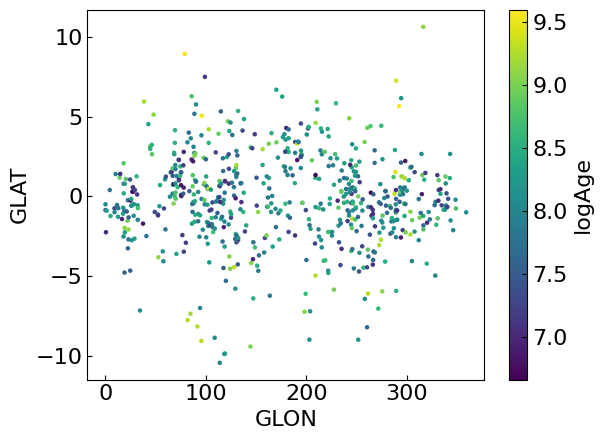

In [9]:
df.plot(x="GLON", y='GLAT', c='logAge', kind='scatter', marker='.')

In [10]:
df_young = df[df['logAge']<7.5]
df_young

,Seq,Cluster,RA_ICRS,s_RA_ICRS,DE_ICRS,s_DE_ICRS,GLON,s_GLON,GLAT,s_GLAT,...,RV,s_RV,Nmemb,NmembRV,Flag,logAge,Dist,AV,_RA.icrs,_DE.icrs
0,0,UBC1001,267.359985,0.10,-29.230000,0.04,0.180000,0.05,-0.86,0.08,...,NaN,NaN,29,0,a,7.464,2786.0,1.914,267.3600,-29.23
4,4,UBC1005,272.179993,0.06,-21.420000,0.08,9.120000,0.08,-0.75,0.06,...,NaN,NaN,31,0,a,7.371,1542.0,1.230,272.1800,-21.42
12,12,UBC1013,273.130005,0.11,-15.330000,0.11,14.890000,0.11,1.41,0.10,...,NaN,NaN,50,0,,7.045,1839.0,1.198,273.1300,-15.33
13,13,UBC1014,276.549988,0.09,-15.150000,0.08,16.610001,0.09,-1.42,0.07,...,NaN,NaN,28,0,,6.993,2126.0,1.899,276.5500,-15.15
32,32,UBC1033,278.119995,0.08,-6.870000,0.08,24.660000,0.08,1.06,0.08,...,NaN,NaN,34,0,,7.451,2532.0,2.751,278.1200,-6.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,UBC1603,12.330000,0.11,65.510002,0.06,122.709999,0.05,2.64,0.06,...,NaN,NaN,10,0,,7.374,3084.0,2.035,12.3300,65.51
612,612,UBC1613,96.620003,0.08,17.340000,0.03,194.699997,0.03,2.49,0.07,...,NaN,NaN,10,0,,7.342,5170.0,1.003,96.6200,17.34
615,615,UBC1616,119.919998,0.08,-26.020000,0.06,243.660004,0.04,1.98,0.08,...,NaN,NaN,13,0,,7.054,6994.0,0.817,119.9200,-26.02
619,619,UBC1620,131.910004,0.07,-44.570000,0.09,264.410004,0.07,-0.69,0.08,...,NaN,NaN,14,0,,7.045,2189.0,2.832,131.9100,-44.57


In [11]:
import madys
from pathlib import Path

model = 'parsec'
for i,name in enumerate(df_young.Cluster):
    outdir = Path(cd.catalog_name)
    
    print(i, name)
    d = df_mem.query("Cluster==@name")
    star_list = d.GaiaEDR3.apply(lambda x: f"Gaia DR3 {x}").tolist()
    try:
        p=madys.SampleObject(star_list, id_type='DR3', ext_map='leike')
        n = 2 if len(d)>100 else 1
        
        fp = outdir.joinpath(f'{name}_{model}.png')
        p[::n].CMD('Gbp-Grp', 'G', model, tofile=fp, 
                 xlim=(0, 2),
                 ylim=(8, 0)
                )
    except Exception as e:
        print(e)

0 UBC1001
1 UBC1005
2 UBC1013
3 UBC1014
4 UBC1033
5 UBC1034
6 UBC1038
7 UBC1039
8 UBC1040
9 UBC1041
10 UBC1045
11 UBC1047
12 UBC1051
13 UBC1059
14 UBC1066
15 UBC1069
16 UBC1072
17 UBC1075
18 UBC1078
19 UBC1092
20 UBC1093
21 UBC1094
22 UBC1098
23 UBC1099
24 UBC1100
25 UBC1101
26 UBC1102
27 UBC1103
28 UBC1104
29 UBC1105
30 UBC1106
31 UBC1107
32 UBC1109
33 UBC1117
34 UBC1122
35 UBC1150
36 UBC1165
37 UBC1166
38 UBC1168
39 UBC1172
40 UBC1177
41 UBC1182
42 UBC1185
43 UBC1201
44 UBC1203
45 UBC1208
46 UBC1209
47 UBC1214
48 UBC1223
49 UBC1227
50 UBC1229
51 UBC1234
52 UBC1237
53 UBC1239
54 UBC1240
55 UBC1244
56 UBC1249
57 UBC1250
58 UBC1253
59 UBC1255
60 UBC1256
61 UBC1264
62 UBC1292
63 UBC1297
64 UBC1304
65 UBC1306
66 UBC1308
67 UBC1312
68 UBC1319
69 UBC1330
70 UBC1333
71 UBC1370
72 UBC1373
73 UBC1376
74 UBC1380
75 UBC1390
76 UBC1391
77 UBC1400
78 UBC1401
79 UBC1410
80 UBC1429
81 UBC1432
82 UBC1444
83 UBC1445
84 UBC1446
85 UBC1447
86 UBC1449
87 UBC1454
88 UBC1473
89 UBC1491
90 UBC1497
91 UBC150